# 神经元能干什么？
## 一. 预测

房地产商投资问题

### 1. 单个变量

城市人口$\sim$盈利

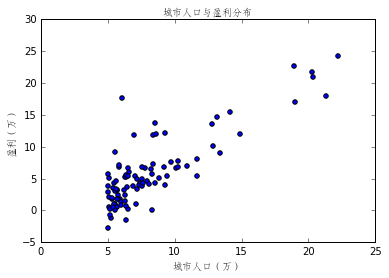

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
#%config InlineBackend.figure_format="svg"
zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/wps-office/FZFSK.TTF')

data = np.loadtxt('profits-population.txt', delimiter=',')

plt.scatter(data[:, 0], data[:, 1], c = 'b')
plt.title(u'城市人口与盈利分布', fontproperties = zhfont)
plt.xlabel(u'城市人口（万）', fontproperties = zhfont)
plt.ylabel(u'盈利（万）', fontproperties = zhfont)
plt.show()

<font color='purple'>某个城市人口$z=18$万，盈利几何？</font>

$\mu (z)$ 不知道，想知道，似乎无法知道，咋办？ <font color='red'>逼近！</font>

$$f(z)=vz$$

假设，得知：
\begin{align}
                          v = 0.80252685
\end{align}
则：

f(z) = 14.445483


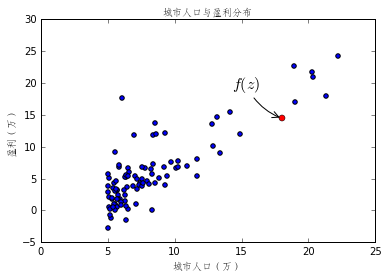

In [4]:
#计算f(z)
v = 0.80252685
z = 18
f = v * z
print "f(z) = %f" %f

#绘制结果
plt.scatter(data[:, 0], data[:, 1], c = 'b')
plt.title(u'城市人口与盈利分布', fontproperties = zhfont)
plt.xlabel(u'城市人口（万）', fontproperties = zhfont)
plt.ylabel(u'盈利（万）', fontproperties = zhfont)
plt.plot(z, f, 'o', c = 'r')
plt.annotate(r'$f(z)$',
             xy = (z, f), xycoords = 'data',
             xytext = (-50, +30), textcoords = 'offset points', fontsize = 16,
             arrowprops = dict(arrowstyle = "->", connectionstyle = "arc3,rad=.2"))
plt.show()

initial cost:  32.072734
v: 0.802527
final cost:  5.858656


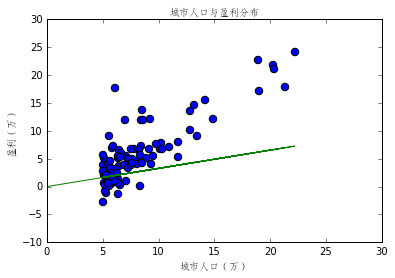

In [5]:
#绘制f(z)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib as mpl
from numpy import loadtxt, zeros



#Evaluate the linear regression
def compute_cost(Z, T, v):
    '''
    Comput cost for linear regression
    '''
    #Number of training samples
    m = T.size

    predictions = Z * v

    sqErrors = (predictions - T) ** 2

    J = (1.0 / (2 * m)) * sqErrors.sum()

    return J


def gradient_descent(Z, T, v, eta, num_iters):
    '''
    Performs gradient descent to learn v
    by taking num_iters gradient steps with learning
    rate eta
    '''
    m = T.size
    J_history = zeros(shape=(num_iters, 1))
    v_history = zeros(shape=(num_iters, 1)) 

    v = 0

    for i in range(num_iters):

        predictions = Z * v
        
        #这里用到了导数
        errors = (predictions - T) * Z

        v = v - eta * (1.0 / m) * errors.sum()

        J_history[i, 0] = compute_cost(Z, T, v)
        v_history[i, 0] = v

    return v, J_history, v_history


#Load the dataset
data = loadtxt('profits-population.txt', delimiter=',')

Z = data[:, 0]
T = data[:, 1]


#number of training samples
m = T.size

#Initialize the parameter v
v = 0


#<iterations = 200, eta = 0.01>无震荡
#<iterations = 200, eta = 0.02>有震荡，但趋于稳定
#<iterations = 200, eta = 0.025>有震荡，但趋于发散

#Some gradient descent settings
iterations = 500
#eta= 0.01
eta = 0.005

#compute and display initial cost
print 'initial cost:  %f' %compute_cost(Z, T, v)

v, J_history, v_history = gradient_descent(Z, T, v, eta, iterations)

print 'v: %f' %v

#print J_history

#print v_history

#compute and display final cost
print 'final cost:  %f' %compute_cost(Z, T, v)

########################################################

#plotting the results

zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/wps-office/FZFSK.TTF')

data = np.loadtxt('profits-population.txt', delimiter=',')

fig = plt.figure()

plt.scatter(data[:, 0], data[:, 1], s = 55, c = 'b')
plt.title(u'城市人口与盈利分布', fontproperties = zhfont)
plt.xlabel(u'城市人口（万）', fontproperties = zhfont)
plt.ylabel(u'盈利（万）', fontproperties = zhfont)
plt.ylim(-10, 30)
plt.xlim(0,30)

v = v_history
v_start = 0
#插入(0,0)点
Z = np.insert(Z, 0, 0)

line, = plt.plot(Z, Z * v_start, color = 'g')

def animate(v):
    line.set_ydata(Z * v)  # update the data
    return line,

ani = animation.FuncAnimation(fig, animate, v, interval=200, blit=True)
plt.show()

<font color='purple'>$v$有何特别之处？它们是如何得到的？</font>

$\varepsilon  = \sum\limits_{p = 1}^m {(t_p - o_p)^2} $，这里，对于第$p$个$<z,f(z)>$对，$o_p=f(z_p)=vz_p$，而$t_p$是$z_p$对应的实际盈利。

可将$\varepsilon$视为$v$的函数，即$\varepsilon(v)  = \sum\limits_{p = 1}^m {(t_p - o_p)^2} $，则$v$的最优值就是使得$\varepsilon$最小的那个值。

令$\varepsilon(v)  = \frac{1}{2}\sum\limits_{p = 1}^m {(t_p - o_p)^2} $

$\varepsilon'(v)=\frac{d\varepsilon}{dv}=-\sum\limits_{p = 1}^m {(t_p - o_p)z_p}=\sum\limits_{p = 1}^m {(o_p - t_p)z_p}$

$v(t) = v(t-1)-\eta\varepsilon'$



<font color='purple'>某个城市人口$z=18$万，盈利几何？</font>

$\mu (z)$ 不知道，想知道，似乎无法知道，咋办？ <font color='red'>逼近！</font>

$$f(z)=v_0+v_1z$$

假设，得知：
\begin{align}
                          v_0 &= -3.63029144\\ 
                          v_1 &= 1.16636235
\end{align}
则：

f(z) = 16.197869


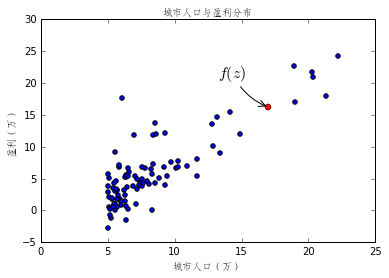

In [6]:
#计算f(z)
v_0 = -3.63029144
v_1 = 1.16636235
z = 17
f = v_0 + v_1 * z
print "f(z) = %f" %f

%matplotlib inline
#绘制结果
plt.scatter(data[:, 0], data[:, 1], c = 'b')
plt.title(u'城市人口与盈利分布', fontproperties=zhfont)
plt.xlabel(u'城市人口（万）', fontproperties=zhfont)
plt.ylabel(u'盈利（万）', fontproperties=zhfont)
plt.plot(z, f, 'o', c = 'r')
plt.annotate(r'$f(z)$',
             xy = (z, f), xycoords = 'data',
             xytext = (-50, +30), textcoords = 'offset points', fontsize = 16,
             arrowprops = dict(arrowstyle = "->", connectionstyle = "arc3,rad=.2"))
plt.show()

initial cost 32.072734:
v:0.802527
final cost 5.858656:


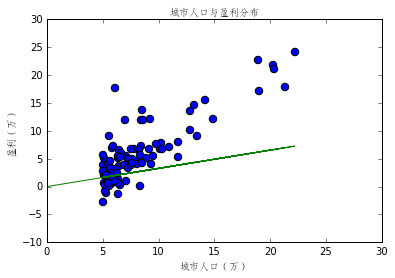

In [7]:
#绘制f(z)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib as mpl
from numpy import loadtxt, zeros



#Evaluate the linear regression
def compute_cost(Z, T, v):
    '''
    Comput cost for linear regression
    '''
    #Number of training samples
    m = T.size

    predictions = Z * v

    sqErrors = (predictions - T) ** 2

    J = (1.0 / (2 * m)) * sqErrors.sum()

    return J


def gradient_descent(Z, T, v, eta, num_iters):
    '''
    Performs gradient descent to learn v
    by taking num_iters gradient steps with learning
    rate eta
    '''
    m = T.size
    J_history = zeros(shape=(num_iters, 1))
    v_history = zeros(shape=(num_iters, 1)) 

    v = 0

    for i in range(num_iters):

        predictions = Z * v
        
        #这里用到了导数
        errors = (predictions - T) * Z

        v = v - eta * (1.0 / m) * errors.sum()

        J_history[i, 0] = compute_cost(Z, T, v)
        v_history[i, 0] = v

    return v, J_history, v_history


#Load the dataset
data = loadtxt('profits-population.txt', delimiter=',')

Z = data[:, 0]
T = data[:, 1]


#number of training samples
m = T.size

#Initialize the parameter v
v = 0


#<iterations = 200, eta = 0.01>无震荡
#<iterations = 200, eta = 0.02>有震荡，但趋于稳定
#<iterations = 200, eta = 0.025>有震荡，但趋于发散

#Some gradient descent settings
iterations = 500
#eta= 0.01
eta = 0.005

#compute and display initial cost
print 'initial cost %f:' %compute_cost(Z, T, v)

v, J_history, v_history = gradient_descent(Z, T, v, eta, iterations)

print 'v:%f' %v

#print J_history

#print v_history

#compute and display final cost
print 'final cost %f:' %compute_cost(Z, T, v)

########################################################

#plotting the results

zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/wps-office/FZFSK.TTF')

data = np.loadtxt('profits-population.txt', delimiter=',')

fig = plt.figure()

plt.scatter(data[:, 0], data[:, 1], s = 55, c = 'b')
plt.title(u'城市人口与盈利分布', fontproperties = zhfont)
plt.xlabel(u'城市人口（万）', fontproperties = zhfont)
plt.ylabel(u'盈利（万）', fontproperties = zhfont)
plt.ylim(-10, 30)
plt.xlim(0,30)

v = v_history
v_start = 0
#插入(0,0)点
Z = np.insert(Z, 0, 0)

line, = plt.plot(Z, Z * v_start, color = 'g')

def animate(v):
    line.set_ydata(Z * v)  # update the data
    return line,

ani = animation.FuncAnimation(fig, animate, v, interval=200, blit=True)
#plt.show()
ani

<font color='purple'>$v_0$、$v_1$有何特别之处？它们是如何得到的？</font>

$\varepsilon  = \sum\limits_{p = 1}^m {(t_p - o_p)^2} $，这里，对于第$p$个$<z,f(z)>$对，$o_p=f(z_p)=v_0+v_1z_p$，而$t_p$是$z_p$对应的实际盈利。

可将$\varepsilon$视为$v_0$、$v_1$的函数，即$\varepsilon(v_0,v_1)  = \sum\limits_{p = 1}^m {(t_p - o_p)^2} $。

$\frac{\partial^2 y}{\partial x^2}$



### 2. 多个变量

城市人口$\sim$盈利